<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Modelos-de-Classificacao-KNN-Reg-logistica/blob/main/Modelos_de_Classifica%C3%A7%C3%A3o_Flai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Classificação**

In [30]:
#bibliotecas que serão usadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **1 - Importando e conhecendo os Dados**





In [12]:
dados = pd.read_csv('https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv')

In [6]:
dados.shape

(1338, 7)

In [7]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
dados['smoker'] = dados['smoker'].map({'yes':1,"no":0}) #substitui a string por valor numérico, variável continuas sendo categórica
dados['charges'] = dados['charges']/1000 # divide por 1000 para facilitar os cálculo, isso não influência na análise e modelagem 
dados.head() #conferindo

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16.884924
1,18,male,33.770,1,0,southeast,1.725552
2,28,male,33.000,3,0,southeast,4.449462
3,33,male,22.705,0,0,northwest,21.984471
4,32,male,28.880,0,0,northwest,3.866855


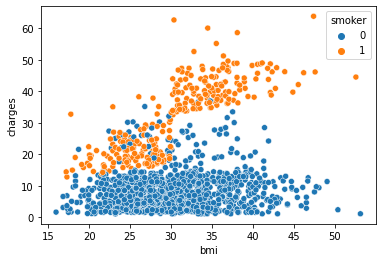

In [15]:
sns.scatterplot(x='bmi', y='charges',data=dados, hue='smoker')

Visualmente, levando em conta apenas 2 variáveis, os fumantes estão acima de 10 no eixo y. Abaixo de 10 as chances de ser fumante são nulas ou quase.

### Separando em dados em variáveis explicativas X e alvo y

In [17]:
X = dados[['bmi', 'charges']]
y = dados.smoker

In [18]:
X.head()

,bmi,charges
0,27.900,16.884924
1,33.770,1.725552
2,33.000,4.449462
3,22.705,21.984471
4,28.880,3.866855


In [19]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

# **2 - Validação Cruzada**

In [21]:
#importando as Bibliotecas
from sklearn.model_selection import KFold, cross_val_score

In [22]:
kf = KFold(n_splits=1338, shuffle=True)

## **2.1 -  Regressão Logística**

In [25]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

### **Desempenho do Modelo**

In [26]:
acuracia = cross_val_score(log_model, X, y,cv=kf, scoring='accuracy')

In [29]:
rl = (acuracia.mean() *100).round(2)

print(f'A acurácia do modelo de Regressão Logística é de {rl} %')

A acurácia do modelo de Regressão Logística é de 93.27 %


### **Região de Decisão**

In [31]:
from mlxtend.plotting import plot_decision_regions

In [32]:
log_model = LogisticRegression()
log_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


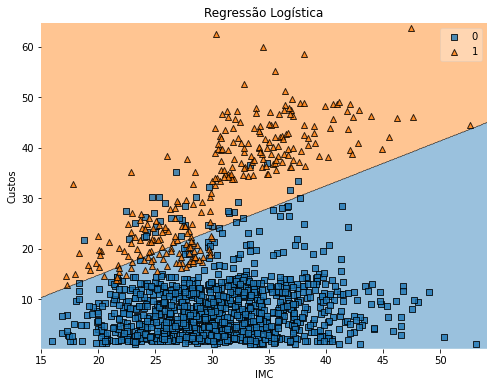

In [37]:
#fazendo o gráfico
plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, clf=log_model, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Regressão Logística')
plt.show()

Abaixo da reta é classificado como não fumante e acima como fumante.

## **2.2 - KNN**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=255)

acuracia_knn = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

In [42]:
knn5 = (acuracia_knn.mean() *100).round(2)
print(f'A acurácia do modelo KNN é de {knn5} %')

A acurácia do modelo KNN é de 90.13 %


### **Região de decisão**

In [44]:
knn_model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=255, p=2,
                     weights='uniform')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


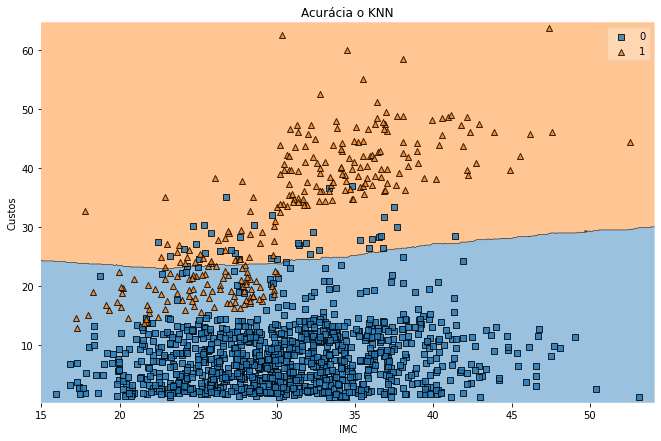

In [47]:
plt.figure(figsize=(11,7))
plot_decision_regions(X.values, y.values, clf=knn_model, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia o KNN')
plt.show()
